<a href="https://colab.research.google.com/github/psaini79/AlternusVera/blob/master/sensational_Analysis_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alternus Vera 

Course code : **CMPE-257** 
    
Group name : **TEAM DRIFTER**
    
Name: **Paramdeep Saini**  **013770341**

-----

GitHub URL: 


### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    
    Column 1: the ID of the statement ([ID].json).
    
    Column 2: the label.
    
    Column 3: the statement.
    
    Column 4: the subject(s).
    
    Column 5: the speaker.
    
    Column 6: the speaker's job title.
    
    Column 7: the state info.
    
    Column 8: the party affiliation.
    
    Column 9-13: the total credit history count, including the current statement.
    
    Column 14: the context (venue / location of the speech or statement).
    
###  Process of My Approach
* Load the Data
* Distillation Process  
  * Data Cleaning and Text Preprocessing
  * Visualization
* Feature 1 : Sentiment Analysis
* Feature 2 : LDA Topic Modelling
* Feature 3 : Sensationalism
* Feature 4 : Political Affiliation
* Feature 5 : Clickbait
* Feature 6 : Spam
* Feature 7 : Author Credibility
* Feature 8 : Source Reputation
* Feature 9 : Content Length
* Feature 10 : Word Frequency
* Vector Classification Modeling
* Ranking and Importance
* Merge all features and individual contributions
* Form Polynomial Equation

#### Feature Selection
List top Features Selected based on research articles
* Sensationalism
* Political Affiliation 
* 
*

#### Team Contribution

|Features  |  Member |
|-----|-----|
| Sensationalism                         |  Paramdeep Saini |  
| PolticalAffiliation                 |  Julian | 
| Biased                   |  Viswa  |   
| Authenticity                             |  RajaLakshmi |

#### Enrichment
* Kaggle Fake news Data 2016

##### Libraries
* NLTK
* Gensim
* Numpy
* Pandas
* CSV
* WordCloud
* Seaborn
* Scipy
* Regualr Expression
* Matplotlib
* Sklearn

#### What did I try and What worked?
* I preprocessed the given dataset using NLTK in-build libraries for tokenization, stopwords removal, stemming and lemmentization. 
* Visualized the cleaned data using WordCloud. I decided to extract compound features like Sentiment.
* Sensationalism and LDA Topic score and utilized it to classify the news document as fake or not.
* I tried following methods.
  * Desicion tree - Accuracy 52%
  * Random Forest - Accuracy 51%
  * Naive Bayes - Accuracy 58%
  * Random Forest - Accuracy 53%

  We found that sensational data had following characteristics:
 * Higher punctuations like (!,?), 
 * Higher profanity, 
 * Lot of sensational phrases and number of capital letters.
 * Second dataset used along with doc2vec to get sensationalism classification. 
 * Accuracy level better. 
 * Based on this, we can say if we have sensationalism classificaition on liar dataset then results would be much better.
 
#### What did not work?
* Sensationalism is not enough to conclude if a news is fake or not but it does play a role.
* Sensationalism is not linearly related to the overall equation.
* It is better to understand that there are many factors which can play the role to determine if news is fake or not such as political affliation, creditbility source and biased.
* Using only sensationalism doesn't provide any linear relationship between fakenews.

#### What alternatives did you try?
* I used the data enrichment downloaded from kaggle and integrated with LL dataset.
* Applied Doc2vec algorthim 
* Applied Random forst and Naive Bayes. New accuracy level is 84%
* We assigned 35% importance to sensationalism among the 4 factors that we are using to classify data as true or not. Hence sensationalism factor = 0.35*(prediction from NB)
* Accuracy has improved as compared to LL after data amlagamation.


In [1]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('popular')
nltk.download('punkt')
import matplotlib.pyplot as plt
from scipy import sparse

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
googleDrive = GoogleDrive(gauth)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
test_link = "https://drive.google.com/open?id=1_xQWkwm-ZD0NR824TH_eTyIYzW79uvyZ"
testfluff, test_id = test_link.split('=')
train_link = "https://drive.google.com/open?id=1kqCYbfVoHXE3qjjcZR6L0degFuQ0EJGc"
trainfluff, train_id = train_link.split('=')
valid_link = "https://drive.google.com/open?id=1gq7xgR9pG7G22STzQV8WYgySGcRP2hks"
validfluff, valid_id = valid_link.split('=')

In [0]:
# Read the test, training and valid data from files
# Header = 0 indicates that the first line of the file contains column names,
# As there is no Header, create a column names for each column in the dataset
# delimiter = \t indicates that the fields are seperated by tabs, and 


colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

downloaded=googleDrive.CreateFile({'id':test_id})
downloaded.GetContentFile('test.csv')
test_news = pd.read_csv("test.csv", sep='\t', names = colnames, error_bad_lines=False)

downloaded=googleDrive.CreateFile({'id':train_id})
downloaded.GetContentFile('train.csv')  
train_news = pd.read_csv("train.csv", sep='\t', names = colnames, error_bad_lines=False)
                        
downloaded = googleDrive.CreateFile({'id':test_id}) 
downloaded.GetContentFile('valid.csv')  
valid_news = pd.read_csv("valid.csv", sep='\t', names = colnames, error_bad_lines=False)
                        
#train_news = pd.read_csv(train_filename, sep='\t', names = colnames, error_bad_lines=False)
#test_news = pd.read_csv(test_filename, sep='\t', names = colnames, error_bad_lines=False)
#valid_news = pd.read_csv(valid_filename, sep='\t', names = colnames, error_bad_lines=False)

In [6]:
#Total number of rows
print("Total Number of Rows and Columns: in Trained Data:", train_news.shape)
print(train_news.loc[0])

Total Number of Rows and Columns: in Trained Data: (10240, 14)
jsonid                                                       2635.json
label                                                            false
headline_text        Says the Annies List political group supports ...
subject                                                       abortion
speaker                                                   dwayne-bohac
speakerjobtitle                                   State representative
stateinfo                                                        Texas
partyaffiliation                                            republican
barelytruecounts                                                     0
falsecounts                                                          1
halftruecounts                                                       0
mostlytrueocunts                                                     0
pantsonfirecounts                                                    0
context       

### Visualize the Data

In [0]:
X_train=train_news["subject"]
Y_train=train_news["label"]

#### The below table shows that most occurred topics include following:
* health-care
* taxes
* immigration etc. 

In [8]:
#cross tabulation
tab=pd.crosstab(X_train,Y_train,margins=True)
tab.sort_values('All', ascending=False)
tab

label                                           barely-true  false  ...  true    All
subject                                                             ...             
Alcohol                                                   0      1  ...     2      4
Alcohol,animals,children,crime                            0      0  ...     1      1
Alcohol,campaign-finance,ethics,public-service            0      0  ...     0      1
Alcohol,candidates-biography                              0      0  ...     1      1
Alcohol,candidates-biography,crime                        1      0  ...     0      1
...                                                     ...    ...  ...   ...    ...
welfare,workers                                           1      0  ...     0      1
women                                                     2      1  ...     3      8
women,workers                                             0      0  ...     0      2
workers                                                   1      2  ...     1     12
All                                                    1654   1993  ...  1676  10238

[3828 rows x 7 columns]

#### The below bar chart shows following:
* 25% in this field have False category
* 20% are half-true.
This indicates that this issue is not extremely polarized to one category.

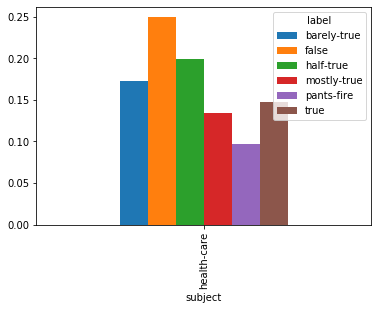

In [9]:
tab_normalized=pd.crosstab(X_train,Y_train,normalize='index', margins=True)
tab_normalized.loc[tab_normalized.index.get_level_values('subject') == "health-care"].plot(kind='bar')

#### Visualize the true and false allocation based on following to classify the desicion:
* False
* barely-true
* pants-fire as lie and half-true
* mostly-true and True as truth in separate column verdict

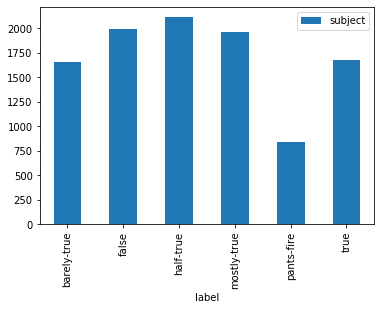

In [10]:
dfTwoCols= train_news[['label','subject']]
dfTwoCols.groupby("label").count().plot(kind='bar')


In [11]:
dfTwoCols['verdict'] = dfTwoCols['label'].map({'false':0, 'true':1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
print(dfTwoCols.head(100))

          label                             subject  verdict
0         false                            abortion        0
1     half-true  energy,history,job-accomplishments        1
2   mostly-true                      foreign-policy        1
3         false                         health-care        0
4     half-true                        economy,jobs        1
..          ...                                 ...      ...
95  barely-true                     social-security        0
96         true              immigration,population        1
97  mostly-true                           education        1
98         true                                guns        1
99  mostly-true                             housing        1

[100 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Visualize the true and false allocation
* In the following bar graph we can see that there are more true values compared to false
* However, there are few exceptions such as candidate-biography as they have more false compared to true. You can these values in the table given below verdict bar graph

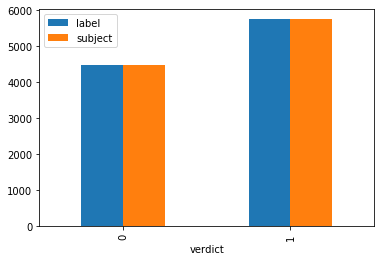

In [12]:
dfTwoCols.groupby("verdict").count().plot(kind='bar')

In [13]:
tab1=pd.crosstab(dfTwoCols["subject"],dfTwoCols["verdict"],margins=True)
tab1.sort_values('All', ascending=False)

verdict                                                0     1    All
subject                                                              
All                                                 4486  5752  10238
health-care                                          198   183    381
taxes                                                124   184    308
immigration                                          120   133    253
elections                                            114   138    252
...                                                  ...   ...    ...
crime,criminal-justice,food-safety                     0     1      1
crime,criminal-justice,government-efficiency,jo...     0     1      1
crime,criminal-justice,government-regulation,gu...     1     0      1
bankruptcy,economy,health-care                         0     1      1
diversity,families,gays-and-lesbians,legal-issu...     1     0      1

[3828 rows x 3 columns]

#### NLP processing like tokeninsing, stemming

From the above analysis, we can proceed further to analyze the sensational analsysi based on news will have extremely polarised graphs

In [14]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
# reference https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data cleaning and stemming function

In [15]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

original word stemmed
0       caresses  caress
1          flies     fli
2           dies     die
3          mules    mule
4         denied    deni
5           died     die
6         agreed    agre
7          owned     own
8        humbled   humbl
9          sized    size
10       meeting    meet
11       stating   state
12       siezing    siez
13   itemization    item
14   sensational  sensat
15   traditional  tradit
16     reference   refer
17     colonizer   colon
18       plotted    plot

In [0]:
def lemmatizeStemming(text):
        return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [0]:
def preProcess(text):
    result = []
    sdds= gensim.utils.simple_preprocess(text)
    for token in sdds:
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatizeStemming(token))
    return result

In [18]:
# testing on a single document
doc_sample = train_news[train_news['jsonid'] == '2635.json']["headline_text"][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preProcess(doc_sample))

original document: 
['Says', 'the', 'Annies', 'List', 'political', 'group', 'supports', 'third-trimester', 'abortions', 'on', 'demand.']


 tokenized and lemmatized document: 
['say', 'anni', 'list', 'polit', 'group', 'support', 'trimest', 'abort', 'demand']


In [19]:
# do for all documents
reviewed_docs = train_news['headline_text'].map(preProcess)
reviewed_docs[:10]

0    [say, anni, list, polit, group, support, trime...
1    [declin, coal, start, start, natur, take, star...
2    [hillari, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legisl, like, mandat, f...
4                    [econom, turnaround, start, term]
5    [chicago, bear, start, quarterback, year, tota...
6               [dunnam, live, district, repres, year]
7    [person, stage, work, activ, year, pass, russ,...
8    [take, million, oregon, lotteri, fund, port, n...
9    [say, primari, oppon, glenn, grothman, leibham...
Name: headline_text, dtype: object

In [20]:
# create the dictionary
dict = gensim.corpora.Dictionary(reviewed_docs)
count = 0
for key, value in dict.iteritems():
    print(key, value)
    count += 1
    if count > 10:
        break

0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 trimest
9 administr
10 begin


In [21]:
# delete the words which appear many times and limit to 100000 words
dict.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
print(dict)

Dictionary(1072 unique tokens: ['abort', 'demand', 'group', 'list', 'polit']...)


In [22]:
bcorpus = [dict.doc2bow(doc) for doc in reviewed_docs]
bcorpus[10][0]

(24, 2)

In [23]:
# count frequency for each document
bdoc4310 = bcorpus[4310]
for i in range(len(bdoc4310)):
    print("Word {} (\"{}\") appears {} time.".format(bdoc4310[i][0], 
                                               dict[bdoc4310[i][0]], 
bdoc4310[i][1]))
print(len(bcorpus))

Word 7 ("administr") appears 1 time.
Word 85 ("economi") appears 1 time.
Word 127 ("scott") appears 1 time.
Word 128 ("walker") appears 1 time.
Word 182 ("member") appears 2 time.
Word 254 ("job") appears 1 time.
Word 277 ("public") appears 1 time.
Word 323 ("hear") appears 1 time.
Word 542 ("charg") appears 1 time.
Word 792 ("talk") appears 1 time.
Word 1023 ("field") appears 1 time.
10240


### Naive Bayes Classifier

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=preProcess)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

In [25]:
ctrain=np.array(dfTwoCols["verdict"])
print(ctrain)
ctrain=ctrain.reshape(-1,1)
print(ctrain)

pipeline.fit(train_news['headline_text'],ctrain)

[0 1 1 ... 1 0 0]
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function preProcess at 0x7f832d2e7268>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [26]:
mtest=test_news["headline_text"]
dfTwoCols_test= test_news[['label','subject']]
dfTwoCols_test['verdict'] = dfTwoCols_test['label'].map({'false':0,'true': 1,'barely-true':0,'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols_test
ctest=np.array(dfTwoCols_test["verdict"])
print(ctest)
ctest=ctest.reshape(-1,1)
print(ctest)
predictions = pipeline.predict(mtest)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[1 0 0 ... 0 0 0]
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


## Accuracy

Here we can see that accuracy level is 60%

In [27]:
print(classification_report(ctest,predictions))

              precision    recall  f1-score   support

           0       0.61      0.30      0.40       553
           1       0.61      0.85      0.71       714

    accuracy                           0.61      1267
   macro avg       0.61      0.58      0.56      1267
weighted avg       0.61      0.61      0.58      1267



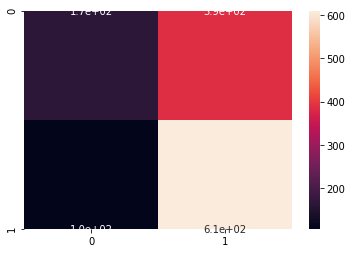

In [28]:
sns.heatmap(confusion_matrix(ctest,predictions),annot=True)
# references: https://www.kaggle.com/astandrik/simple-spam-filter-using-naive-bayes

### Sentiment Analysis Data Enrichment
* This dataset is downloaded from Kaggle for 2016 election fake news

In [0]:
stest_link = "https://drive.google.com/open?id=1nsw6n8GstA5ZXAs9J0-aGjom9Px0dnk2"
stestfluff, stest_id = stest_link.split('=')
strain_link = "https://drive.google.com/open?id=1O41L17NC2QzucWx7o8cuZMAkpfFmRfFQ"
strainfluff, strain_id = strain_link.split('=')

In [0]:
scolnames = ['id', 'title', 'author', 'text', 'label']

downloaded=googleDrive.CreateFile({'id':stest_id})
downloaded.GetContentFile('test_kaggle.csv')
stest_news = pd.read_csv("test_kaggle.csv", sep=',', names = scolnames, error_bad_lines=False)

downloaded=googleDrive.CreateFile({'id':strain_id})
downloaded.GetContentFile('train_kaggle.csv')  
strain_news = pd.read_csv("train_kaggle.csv", sep=',', names = scolnames, error_bad_lines=False)

In [31]:
strain_news

id  ...  label
0         id  ...  label
1          0  ...      1
2          1  ...      0
3          2  ...      1
4          3  ...      1
...      ...  ...    ...
20796  20795  ...      0
20797  20796  ...      0
20798  20797  ...      0
20799  20798  ...      1
20800  20799  ...      1

[20801 rows x 5 columns]

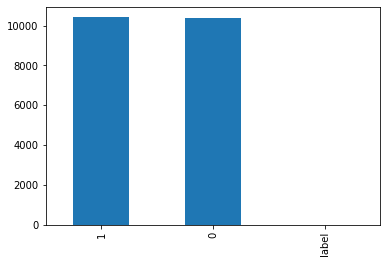

In [32]:
# print the label being addressed here
strain_news['label'].value_counts().plot(kind="bar")
plt.show()

# train/test data split
from sklearn.model_selection import train_test_split
strain, stest = train_test_split(strain_news, test_size=0.2)

### sentimental Analysis

In [33]:
# Using vader lexicon to determine sentiment
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
def nltkSentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [35]:
nltk_results = [nltkSentiment(row) for row in train_news["headline_text"]]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(train_news, columns = ['headline_text'])
nltk_df = text_df.join(results_df)
verdict_df=pd.DataFrame(dfTwoCols, columns=['verdict'])
nltk_df=nltk_df.join(verdict_df)

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [36]:
nltk_df

headline_text  ...  verdict
0      Says the Annies List political group supports ...  ...        0
1      When did the decline of coal start? It started...  ...        1
2      Hillary Clinton agrees with John McCain "by vo...  ...        1
3      Health care reform legislation is likely to ma...  ...        0
4      The economic turnaround started at the end of ...  ...        1
...                                                  ...  ...      ...
10235  There are a larger number of shark attacks in ...  ...        1
10236  Democrats have now become the party of the [At...  ...        1
10237  Says an alternative to Social Security that op...  ...        1
10238  On lifting the U.S. Cuban embargo and allowing...  ...        0
10239  The Department of Veterans Affairs has a manua...  ...        0

[10240 rows x 6 columns]

In [37]:
nltk_df.loc[nltk_df['compound'] > 0.2, 'compound'] = 1
nltk_df.loc[nltk_df['compound'] < -0.2, 'compound'] = -1
nltk_df.loc[(nltk_df['compound'] > -0.2) & (nltk_df['compound'] < 0.2), 'compound'] = 0
nltk_df

headline_text  ...  verdict
0      Says the Annies List political group supports ...  ...        0
1      When did the decline of coal start? It started...  ...        1
2      Hillary Clinton agrees with John McCain "by vo...  ...        1
3      Health care reform legislation is likely to ma...  ...        0
4      The economic turnaround started at the end of ...  ...        1
...                                                  ...  ...      ...
10235  There are a larger number of shark attacks in ...  ...        1
10236  Democrats have now become the party of the [At...  ...        1
10237  Says an alternative to Social Security that op...  ...        1
10238  On lifting the U.S. Cuban embargo and allowing...  ...        0
10239  The Department of Veterans Affairs has a manua...  ...        0

[10240 rows x 6 columns]

In [0]:
nltk_df_f=nltk_df[["headline_text","compound","verdict"]]

#### Analsysis
We can see that effect of negative, neutral and positive sentiment on true and false news

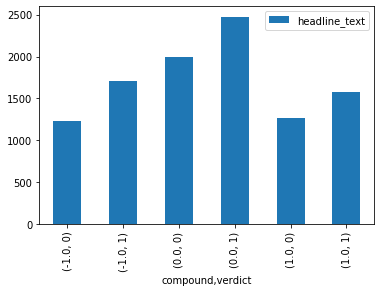

In [39]:
nltk_df_f.groupby(["compound","verdict"]).count().plot(kind='bar')

### LDA

In [0]:
from gensim import corpora, models

tfidf = models.TfidfModel(bcorpus)

In [0]:
ctfidf = tfidf[bcorpus]

In [42]:
from pprint import pprint

for doc in ctfidf:
    pprint(doc)
    break

[(0, 0.3397402827336795),
 (1, 0.5002880765433487),
 (2, 0.4088224168287155),
 (3, 0.4639566513984633),
 (4, 0.40750764496407926),
 (5, 0.10879086838115597),
 (6, 0.27202739591951525)]


In [0]:
#lda bag of words 
lmodel = gensim.models.LdaMulticore(bcorpus, num_topics=10, id2word=dict, passes=2, workers=2)

#### Observation
The following result show different topics using words in each topic and there corresponding weights

In [44]:
for idx, topic in lmodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.068*"say" + 0.050*"obama" + 0.038*"presid" + 0.032*"barack" + 0.015*"job" + 0.014*"clinton" + 0.010*"american" + 0.010*"hillari" + 0.009*"lose" + 0.008*"million"
Topic: 1 
Words: 0.051*"say" + 0.032*"year" + 0.030*"state" + 0.020*"billion" + 0.016*"budget" + 0.014*"texa" + 0.012*"support" + 0.011*"fund" + 0.011*"scott" + 0.011*"govern"
Topic: 2 
Words: 0.023*"year" + 0.018*"say" + 0.017*"percent" + 0.017*"school" + 0.016*"vote" + 0.013*"student" + 0.012*"pass" + 0.011*"job" + 0.010*"peopl" + 0.009*"feder"
Topic: 3 
Words: 0.054*"health" + 0.045*"care" + 0.026*"year" + 0.023*"say" + 0.017*"insur" + 0.013*"secur" + 0.013*"percent" + 0.013*"plan" + 0.012*"peopl" + 0.012*"million"
Topic: 4 
Words: 0.032*"say" + 0.025*"vote" + 0.021*"peopl" + 0.020*"immigr" + 0.016*"work" + 0.015*"illeg" + 0.011*"state" + 0.011*"time" + 0.011*"take" + 0.010*"john"
Topic: 5 
Words: 0.024*"state" + 0.021*"presid" + 0.020*"tax" + 0.020*"say" + 0.019*"obama" + 0.014*"rais" + 0.013*"incom" + 0

#### TF-IDF for running LDA

In [0]:
lmodeltfidf = gensim.models.LdaMulticore(ctfidf, num_topics=10, id2word=dict, passes=2, workers=4)

In [46]:
for idx, topic in lmodeltfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.015*"say" + 0.012*"percent" + 0.012*"state" + 0.010*"counti" + 0.009*"averag" + 0.008*"nation" + 0.007*"rate" + 0.007*"budget" + 0.007*"year" + 0.006*"wisconsin"
Topic: 1 Word: 0.012*"state" + 0.012*"care" + 0.011*"health" + 0.011*"percent" + 0.010*"say" + 0.008*"vote" + 0.008*"billion" + 0.007*"world" + 0.007*"countri" + 0.007*"presid"
Topic: 2 Word: 0.017*"job" + 0.014*"texa" + 0.012*"state" + 0.012*"say" + 0.011*"year" + 0.010*"lose" + 0.009*"percent" + 0.009*"million" + 0.008*"health" + 0.007*"countri"
Topic: 3 Word: 0.012*"percent" + 0.011*"say" + 0.011*"obama" + 0.010*"state" + 0.009*"unemploy" + 0.009*"presid" + 0.007*"rate" + 0.007*"john" + 0.007*"school" + 0.007*"money"
Topic: 4 Word: 0.017*"tax" + 0.016*"rais" + 0.013*"year" + 0.012*"say" + 0.010*"state" + 0.010*"obama" + 0.008*"percent" + 0.008*"presid" + 0.007*"vote" + 0.007*"barack"
Topic: 5 Word: 0.014*"say" + 0.011*"year" + 0.009*"percent" + 0.009*"fund" + 0.007*"school" + 0.007*"american" + 0.007*"milli

In [47]:
for index, score in sorted(lmodel[bcorpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lmodel.print_topic(index, 10)))


Score: 0.6188457012176514	 
Topic: 0.051*"say" + 0.032*"year" + 0.030*"state" + 0.020*"billion" + 0.016*"budget" + 0.014*"texa" + 0.012*"support" + 0.011*"fund" + 0.011*"scott" + 0.011*"govern"

Score: 0.2206573337316513	 
Topic: 0.068*"say" + 0.050*"obama" + 0.038*"presid" + 0.032*"barack" + 0.015*"job" + 0.014*"clinton" + 0.010*"american" + 0.010*"hillari" + 0.009*"lose" + 0.008*"million"

Score: 0.10663557797670364	 
Topic: 0.023*"year" + 0.018*"say" + 0.017*"percent" + 0.017*"school" + 0.016*"vote" + 0.013*"student" + 0.012*"pass" + 0.011*"job" + 0.010*"peopl" + 0.009*"feder"


#### Observation

From the given below result we can evaluate result by classifying sample documents using LDA bag of words model.

In [48]:
for index, score in sorted(lmodeltfidf[bcorpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lmodeltfidf.print_topic(index, 10)))


Score: 0.38951438665390015	 
Topic: 0.017*"job" + 0.014*"texa" + 0.012*"state" + 0.012*"say" + 0.011*"year" + 0.010*"lose" + 0.009*"percent" + 0.009*"million" + 0.008*"health" + 0.007*"countri"

Score: 0.3223271369934082	 
Topic: 0.015*"say" + 0.012*"percent" + 0.012*"state" + 0.010*"counti" + 0.009*"averag" + 0.008*"nation" + 0.007*"rate" + 0.007*"budget" + 0.007*"year" + 0.006*"wisconsin"

Score: 0.2342967987060547	 
Topic: 0.013*"say" + 0.011*"state" + 0.011*"immigr" + 0.010*"job" + 0.010*"peopl" + 0.009*"percent" + 0.009*"illeg" + 0.009*"creat" + 0.008*"year" + 0.007*"program"


### Sensational Quantification

* Based on Punctuation, Length, Similarity to Sensationalism dictionary

In [49]:
dtrain_sensa= train_news
dtrain_sensa['verdict']=dfTwoCols['verdict']
dtrain_sensa

jsonid  ... verdict
0       2635.json  ...       0
1      10540.json  ...       1
2        324.json  ...       1
3       1123.json  ...       0
4       9028.json  ...       1
...           ...  ...     ...
10235   5473.json  ...       1
10236   3408.json  ...       1
10237   3959.json  ...       1
10238   2253.json  ...       0
10239   1155.json  ...       0

[10240 rows x 15 columns]

In [0]:
#profanity list
PROFANITY=['anus', 'arse', 'arsehole', 'ass', 'ass-hat', 'ass-jabber', 'ass-pirate', 'assbag', 'assbandit', 'assbanger', 'assbite', 'assclown', 'asscock', 'asscracker', 'asses', 'assface', 'assfuck', 'assfucker', 'assgoblin', 'asshat', 'asshead', 'asshole', 'asshopper', 'assjacker', 'asslick', 'asslicker', 'assmonkey', 'assmunch', 'assmuncher', 'assnigger', 'asspirate', 'assshit', 'assshole', 'asssucker', 'asswad', 'asswipe', 'balls', 'bampot', 'bastard', 'beaner', 'bint', 'bitch', 'bitchass', 'bitches', 'bitchtits', 'bitchy', 'bloody', 'blowjob', 'blowjob', 'bollocks', 'bollox', 'boner', 'brotherfucker', 'bugger', 'bullshit', 'bumblefuck', 'butt plug', 'butt-pirate', 'buttfucka', 'buttfucker', 'camel toe', 'carpetmuncher', 'chinc', 'chink', 'choad', 'chode', 'clit', 'clitface', 'clitfuck', 'clusterfuck', 'cock', 'cockass', 'cockbite', 'cockburger', 'cockface', 'cockfucker', 'cockhead', 'cockjockey', 'cockknoker', 'cockmaster', 'cockmongler', 'cockmongruel', 'cockmonkey', 'cockmuncher', 'cocknose', 'cocknugget', 'cockshit', 'cocksmith', 'cocksmoke', 'cocksmoker', 'cocksniffer', 'cocksucker', 'cockwaffle', 'coochie', 'coochy', 'coon', 'cooter', 'cracker', 'cum', 'cumbubble', 'cumdumpster', 'cumguzzler', 'cumjockey', 'cumslut', 'cumtart', 'cunnie', 'cunnilingus', 'cunt', 'cuntass', 'cuntface', 'cunthole', 'cuntlicker', 'cuntrag', 'cuntslut', 'dago', 'damn', 'deggo', 'dick', 'dickbag', 'dickbeaters', 'dickface', 'dickfuck', 'dickfucker', 'dickhead', 'dickhole', 'dickjuice', 'dickmilk', 'dickmonger', 'dicks', 'dickslap', 'dicksucker', 'dicksucking', 'dickwad', 'dickweasel', 'dickweed', 'dickwod', 'dike', 'dildo', 'dipshit', 'doochbag', 'dookie', 'douche', 'douche-fag', 'douchebag', 'douchewaffle', 'dumass', 'dumb ass', 'dumbass', 'dumbfuck', 'dumbshit', 'dumshit', 'dyke', 'fag', 'fagbag', 'fagfucker', 'faggit', 'faggot', 'faggotcock', 'fagtard', 'fatass', 'fellatio', 'feltch', 'flamer', 'fool', 'frickin', 'friggin', 'f*ck', 'fuck', 'fuckass', 'fuckbag', 'fuckboy', 'fuckbrain', 'fuckbutt', 'fucked', 'fucker', 'fuckersucker', 'fuckface', 'fuckhead', 'fuckhole', 'fuckin', 'fucking', 'fucknut', 'fucknutt', 'fuckoff', 'fucks', 'fuckstick', 'fucktard', 'fucktart', 'fuckup', 'fuckwad', 'fuckwit', 'fuckwitt', 'fudgepacker', 'gay', 'gayass', 'gaybob', 'gaydo', 'gayfuck', 'gayfuckist', 'gaylord', 'gaytard', 'gaywad', 'goddamn', 'goddamnit', 'gooch', 'gook', 'gringo', 'guido', 'handjob', 'hard on', 'heeb', 'helminth', 'hell', 'ho', 'hoe', 'hoebag', 'homo', 'homodumbshit', 'honkey', 'humping', 'idiot', 'imbecile', 'jackass', 'jap', 'jerk off', 'jerk wad', 'jigaboo', 'jizz', 'jungle bunny', 'junglebunny', 'kike', 'kooch', 'kootch', 'kraut', 'kunt', 'kyke', 'lameass', 'lesbian', 'lesbo', 'lezzie', 'mcfagget', 'mick', 'midget', 'minge', 'moron', 'mothafucka', 'mothafuckin', 'motherfucker', 'motherfucking', 'muff', 'muffdiver', 'munging', 'negro', 'nigaboo', 'nigga', 'nigger', 'niggers', 'niglet', 'nutter', 'nut sack', 'nutsack', 'paki', 'panooch', 'pecker', 'peckerhead', 'penis', 'penisbanger', 'penisfucker', 'penispuffer', 'piss', 'pissed', 'pissed off', 'pissflaps', 'polesmoker', 'pollock', 'poon', 'poonani', 'poonany', 'poontang', 'porch monkey', 'porchmonkey', 'prick', 'punanny', 'punta', 'pussies', 'pussy', 'pussylicking', 'puto', 'queef', 'queer', 'queerbait', 'queerhole', 'renob', 'retard', 'rimjob', 'ruski', 'sand nigger', 'sandnigger', 'schlong', 'schmuck', 'scrote', 'scullion', 'shag', 'shit', 'shitass', 'shitbag', 'shitbagger', 'shitbrains', 'shitbreath', 'shitcanned', 'shitcunt', 'shitdick', 'shitface', 'shitfaced', 'shithead', 'shithole', 'shithouse', 'shitspitter', 'shitstain', 'shitter', 'shittiest', 'shitting', 'shitty', 'shiz', 'shiznit', 'skank', 'skeet', 'skullfuck', 'slag', 'slapper', 'slut', 'slutbag', 'slubberdegullion', 'smeg', 'snatch', 'sodding', 'sonofabitch', 'spastic', 'spic', 'spick', 'splooge', 'spook', 'suckass', 'tard', 'testicle', 'thundercunt', 'tit', 'titfuck', 'tits', 'tittyfuck', 'trollop', 'twat', 'twatlips', 'twats', 'twatwaffle', 'unclefucker', 'va-j-j', 'vag', 'vagina', 'vajayjay', 'vjayjay', 'wank', 'wanker', 'wankjob', 'wetback', 'whore', 'whorebag', 'whoreface', 'wop']

In [0]:
sensationalist_phrases = [

	# From Analyst's Desktop Binder of Homeland Security https://www.scribd.com/doc/82701103/Analyst-Desktop-Binder-REDACTED
	
	'Assassination',
	'Attack',
	'Domestic security',
	'Law enforcement',
	'Disaster',
	'National preparedness',
	'Response',
	'Recovery',
	'Emergency response',
	'First responder',
	'Militia',
	'Shooting',
	'Evacuation',
	'Hostage',
	'Explosion',
	'Organized crime',
	'Gangs',
	'National security',
	'State of emergency',
	'Security breach',
	'Threat',
	'Standoff',
	'Lockdown',
	'Bomb',
	'Riot',
	'Emergency Landing',
	'Incident',
	'Suspicious',
	'Nuclear threat',
	'Hazardous',
	'Infection',
	'Outbreak',
	'Contamination',
	'Terror',
	'Epidemic',
	'Critical Infrastructure',
	'National infrastructure',
	'Transportation security',
	'Grid',
	'Outage',
	'Disruption',
	'Violence',
	'Drug cartel',
	'Narcotics',
	'Shootout',
	'Trafficking',
	'Kidnap',
	'Illegal',
	'Smuggling', 
	'Al Qaeda',
	'Terror attack',
	'Weapon',
	'Improvised explosive device',
	'Suicide bomber',
	'Suicide attack',
	'Hurricane',
	'Tornado',
	'Tsunami',
	'Earthquake',
	'Tremor',
	'Flood',
	'Storm',
	'Extreme weather',
	'Forest fire',
	'Ice',
	'Stranded',
	'Wildfire',
	'Avalanche',
	'Blizzard',
	'Lightening',
	'Emergency Broadcast System',
	'Cyber Security',
	'DDOS',
	'Denial of service',
	'Malware',
	'Phishing',
	'Cyber attack',
	'Cyber terror'
]

In [0]:
def sensphrasedetect(str):
    sum =0
    for x in sensationalist_phrases:
        if x.lower() in str.lower():
            sum+=1
    return sum

In [53]:
## extract punctuation, capital letters, digits, length
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
#s = 'abcd!!?)().'

#print(count(s,set(string.punctuation))                                                                                                      )
#print("Capital Letters: ", sum(1 for c in "ahbcdsSJDH" if c.isupper()))
#print("Capital Letters: ", sum(1 for c in "ahbcdsSJDs2H" if c.isdigit()))
pcCount=[]
capCount=[]
digCount=[]
lenCount=[]
profanCount=[]
sensphrCount=[]
for x in dtrain_sensa['headline_text']:
    pcCount.append(sum(1 for c in x if c=="!" or c=="?"))
    capCount.append(sum(1 for c in x if c.isupper()))
    digCount.append(sum(1 for c in x if c.isdigit()))
    lenCount.append(len(x))
    sensphrCount.append(sensphrasedetect(x))
for x in reviewed_docs:
    try:
        profanCount.append(float(len([w for w in x if w.lower() in PROFANITY]))/len(x))
    except:
        profanCount.append(0)
dtrain_sensa['puncCount']=pcCount
dtrain_sensa['capCount']=capCount
dtrain_sensa['digCount']=digCount
dtrain_sensa['lenCount']=lenCount
dtrain_sensa['profanCount']=profanCount
dtrain_sensa['sensPhrCount']=sensphrCount
dtrain_sensa

jsonid        label  ... profanCount sensPhrCount
0       2635.json        false  ...         0.0            0
1      10540.json    half-true  ...         0.0            0
2        324.json  mostly-true  ...         0.0            0
3       1123.json        false  ...         0.0            0
4       9028.json    half-true  ...         0.0            0
...           ...          ...  ...         ...          ...
10235   5473.json  mostly-true  ...         0.0            1
10236   3408.json  mostly-true  ...         0.0            0
10237   3959.json    half-true  ...         0.0            0
10238   2253.json        false  ...         0.0            0
10239   1155.json   pants-fire  ...         0.0            0

[10240 rows x 21 columns]

#### Observation

##### we observed
* On an average true stories have lower punctuations like (!,?), lower profanity. lower sensational phrases and lower number of capital letters.
* They are more specific with digits and are longer than fake news

In [54]:
dtrain_sensa_true=dtrain_sensa[dtrain_sensa['verdict']==1]
dtrain_sensa_false=dtrain_sensa[dtrain_sensa['verdict']==0]
print("true: "+str(dtrain_sensa_true.shape[0]))
print("avg punc: "+str(dtrain_sensa_true["puncCount"].mean()))
print("avg cap: "+str(dtrain_sensa_true["capCount"].mean()))
print("avg dig: "+str(dtrain_sensa_true["digCount"].mean()))
print("avg len: "+str(dtrain_sensa_true["lenCount"].mean()))
print("avg profan: "+str(dtrain_sensa_true["profanCount"].mean()))
print("avg sensation phr: "+str(dtrain_sensa_true["sensPhrCount"].mean()))
print("false: "+str(dtrain_sensa_false.shape[0]))
print("avg punc: "+str(dtrain_sensa_false["puncCount"].mean()))
print("avg cap: "+str(dtrain_sensa_false["capCount"].mean()))
print("avg dig: "+str(dtrain_sensa_false["digCount"].mean()))
print("avg len: "+str(dtrain_sensa_false["lenCount"].mean()))
print("avg profan: "+str(dtrain_sensa_false["profanCount"].mean()))
print("avg sensation phr: "+str(dtrain_sensa_false["sensPhrCount"].mean()))

true: 5752
avg punc: 0.011648122392211404
avg cap: 3.4838317107093184
avg dig: 1.8666550764951322
avg len: 109.04363699582754
avg profan: 0.0002856388222347888
avg sensation phr: 0.12969401947148818
false: 4488
avg punc: 0.01804812834224599
avg cap: 3.821524064171123
avg dig: 1.3279857397504455
avg len: 104.1954099821747
avg profan: 0.000435591653840317
avg sensation phr: 0.1468360071301248


In [55]:
dtest_sensa=test_news
dtest_sensa['verdict']=dfTwoCols_test['verdict']
dtest_sensa

jsonid        label  ...                                 context verdict
0     11972.json         true  ...                         Radio interview       1
1     11685.json        false  ...                       a news conference       0
2     11096.json        false  ...            comments on ABC's This Week.       0
3      5209.json    half-true  ...                            a radio show       1
4      9524.json   pants-fire  ...                             a web video       0
...          ...          ...  ...                                     ...     ...
1262   7334.json    half-true  ...                       a news conference       1
1263   9788.json  barely-true  ...                    on ABC's "This Week"       0
1264  10710.json  barely-true  ...  a commentary in The Providence Journal       0
1265   3186.json  barely-true  ...                       a news conference       0
1266   6743.json        false  ...               an interview with NJToday       0

[1267 rows x 15 columns]

In [56]:
processed_docs_test = test_news['headline_text'].map(preProcess)
processed_docs_test[:10]

0           [build, wall, mexico, border, liter, year]
1       [wisconsin, pace, doubl, number, layoff, year]
2                       [say, john, mccain, help, vet]
3    [suzann, bonamici, support, plan, choic, medic...
4    [ask, report, center, crimin, scheme, violat, ...
5    [past, year, feder, govern, pay, million, reti...
6    [say, tennesse, requir, school, receiv, half, ...
7    [say, vice, presid, biden, admit, american, pe...
8                [donald, trump, marriag, equal, want]
9    [know, half, hillari, clinton, meet, secretari...
Name: headline_text, dtype: object

In [57]:
## extract punctuation, capital letters, digits, length
import string
tpcCount=[]
tcapCount=[]
tdigCount=[]
tlenCount=[]
tprfanCount=[]
tsensphrCount=[]
for x in dtest_sensa['headline_text']:
    tpcCount.append(sum(1 for c in x if c=="!" or c=="?"))
    tcapCount.append(sum(1 for c in x if c.isupper()))
    tdigCount.append(sum(1 for c in x if c.isdigit()))
    tlenCount.append(len(x))
    tsensphrCount.append(sensphrasedetect(x))
for x in processed_docs_test:
    try:
        tprfanCount.append(float(len([w for w in x if w.lower() in PROFANITY]))/len(x))
    except:
        tprfanCount.append(0)

dtest_sensa['puncCount']=tpcCount
dtest_sensa['capCount']=tcapCount
dtest_sensa['digCount']=tdigCount
dtest_sensa['lenCount']=tlenCount
dtest_sensa['profanCount']=tprfanCount
dtest_sensa['sensPhrCount']=tsensphrCount
dtest_sensa

jsonid        label  ... profanCount sensPhrCount
0     11972.json         true  ...         0.0            0
1     11685.json        false  ...         0.0            0
2     11096.json        false  ...         0.0            0
3      5209.json    half-true  ...         0.0            1
4      9524.json   pants-fire  ...         0.0            0
...          ...          ...  ...         ...          ...
1262   7334.json    half-true  ...         0.0            0
1263   9788.json  barely-true  ...         0.0            0
1264  10710.json  barely-true  ...         0.0            0
1265   3186.json  barely-true  ...         0.0            0
1266   6743.json        false  ...         0.0            0

[1267 rows x 21 columns]

In [58]:
dtest_sensa.columns[15:21]

Index(['puncCount', 'capCount', 'digCount', 'lenCount', 'profanCount',
       'sensPhrCount'],
      dtype='object')

In [59]:
dtrain_sensa.columns[15:21]

Index(['puncCount', 'capCount', 'digCount', 'lenCount', 'profanCount',
       'sensPhrCount'],
      dtype='object')

In [0]:
x_train=dtrain_sensa[dtrain_sensa.columns[15:21]]
y_train=dtrain_sensa['verdict']
x_test= dtest_sensa[dtest_sensa.columns[15:21]]
y_test = dtest_sensa['verdict']

In [63]:
from IPython.display import Image  
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot
dot_data = StringIO()  
dtree=DecisionTreeClassifier()
features = list(dtrain_sensa.columns[15:21])
from sklearn.metrics import accuracy_score
#dtree.fit(x_train.fillna(method='ffill'),y_train.fillna(method='ffill'))
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
print('Accuracy score is:')
#print(accuracy_score(y_test.fillna(method='ffill'),y_pred.fillna(method='ffill')))
print(accuracy_score(y_test,y_pred))

#we need pass features columns and dtree to graphviz 
#export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
#graph = pydot.graph_from_dot_data(dot_data.getvalue())
#Image(graph[0].create_png())

Accuracy score is:
0.5288082083662194


In [93]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(classification_report(y_test,rfc_pred))
cnfmtx=confusion_matrix(y_test,rfc_pred)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, rfc_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, rfc_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, rfc_pred)))
print("Accuracy ",accuracy_score(y_test,rfc_pred))

tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = features, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

              precision    recall  f1-score   support

           0       0.44      0.42      0.43       553
           1       0.56      0.59      0.57       714

    accuracy                           0.51      1267
   macro avg       0.50      0.50      0.50      1267
weighted avg       0.51      0.51      0.51      1267

Confusion matrix:
 [[230 323]
 [296 418]]
Mean squared error: 0.49
Mean absolute error: 0.49
Root Mean Squared Error: 0.70 
Accuracy  0.5114443567482242
Variable: lenCount             Importance: 0.74
Variable: capCount             Importance: 0.11
Variable: digCount             Importance: 0.1
Variable: sensPhrCount         Importance: 0.02
Variable: sensationCol         Importance: 0.02
Variable: puncCount            Importance: 0.01
Variable: profanCount          Importance: 0.0


In [64]:
#Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(classification_report(y_test,y_pred))
cnfmtx=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy :', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.04      0.08       553
           1       0.57      0.98      0.72       714

    accuracy                           0.57      1267
   macro avg       0.59      0.51      0.40      1267
weighted avg       0.58      0.57      0.44      1267

Confusion matrix:
 [[ 23 530]
 [ 15 699]]
Mean squared error: 0.43
Mean absolute error: 0.43
Root Mean Squared Error: 0.66 
Accuracy : 0.5698500394632992


In [65]:
#SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
model = SVC()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
cnfmtx=confusion_matrix(y_test,predictions)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, predictions))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, predictions)))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.50      0.27      0.35       553
           1       0.58      0.79      0.67       714

    accuracy                           0.56      1267
   macro avg       0.54      0.53      0.51      1267
weighted avg       0.55      0.56      0.53      1267

Confusion matrix:
 [[152 401]
 [152 562]]
Mean squared error: 0.44
Mean absolute error: 0.44
Root Mean Squared Error: 0.66 


In [66]:
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

reg = linear_model.LinearRegression() 

# Train the model using the training sets
reg.fit(x_train, y_train) 

coeff_df = pd.DataFrame(reg.coef_, x_train.columns, columns=['Coefficient'])  
print(coeff_df)  

# Make predictions using the testing set
y_pred = reg.predict(x_test)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df1)
print("R squared : %.2f" %r2_score(y_test, y_pred))
print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, y_pred)))

              Coefficient
puncCount       -0.047841
capCount        -0.019448
digCount         0.011217
lenCount         0.000529
profanCount     -0.688974
sensPhrCount    -0.034825
      Actual  Predicted
0          1   0.521387
1          0   0.577086
2          0   0.512392
3          1   0.495558
4          0   0.552606
...      ...        ...
1262       1   0.587140
1263       0   0.560154
1264       0   0.569160
1265       0   0.458409
1266       0   0.628941

[1267 rows x 2 columns]
R squared : 0.03
Mean squared error: 0.24
Mean absolute error: 0.48
Root Mean Squared Error: 0.49 


### Sensational Analysis

In [0]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [68]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##### Using data enrichment from kaggle dataset to get train data for sensationalism to be added as a component to improve accuracy

In [0]:
sense_link = "https://drive.google.com/open?id=1VVbzIx8JARjuqcuMNQ4wQrheyD5AidV9"
sensefluff, sense_id = sense_link.split('=')

In [70]:
downloaded=googleDrive.CreateFile({'id':sense_id})
downloaded.GetContentFile('sense.csv')
df_Sensational = pd.read_csv("sense.csv")
df_Sensational

headline  ... issensational
0    VIDEO: Host Breaks Down As He Learns What Musl...  ...             1
1    Chinese city leadership shake-up signals Xi po...  ...             0
2    Miami judge rules Florida’s new ‘Stand Your Gr...  ...             1
3    Trump, reversing course, wants Senate Republic...  ...             0
4    Pro-life group alleges Twitter is suppressing ...  ...             1
..                                                 ...  ...           ...
995  No 3rd trial for former Ohio police officer wh...  ...             0
996  Putin And Trump Discussed Election Interferenc...  ...             1
997  White College Employees Fired for Parody Rap A...  ...             1
998  Man Stuck Inside Of ATM Begs For Help As Peopl...  ...             1
999  Dear NeverTrumpers: Trump Signs VA Accountabil...  ...             1

[1000 rows x 4 columns]

In [71]:
data = df_Sensational['article'].values.tolist()
print(type(data))
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(df_Sensational.loc[i,'issensational'])]) for i, _d in enumerate(data)]
tagged_data

<class 'list'>


[TaggedDocument(words=['june', '27', ',', '2017emily', 'annreligion', ',', 'world', 'news', 'a', 'woman', 'named', 'dakhill', '(', 'left', ')', 'tells', 'the', 'story', 'of', 'sex', 'slaves', 'held', 'hostage', 'by', 'isis', '(', 'right', ')', '.', 'a', 'woman', 'who', 'was', 'held', 'hostage', 'by', 'isis', 'was', 'unknowingly', 'forced', 'to', 'eat', 'the', 'unthinkable', 'while', 'being', 'kept', 'in', 'a', 'cell', 'by', 'the', 'fanatics', '.', 'after', 'isis', 'had', 'starved', 'the', 'mother', 'for', 'three', 'days', ',', 'the', 'iraqi', 'men', 'served', 'her', 'what', 'she', 'thought', 'was', 'meat', 'and', 'rice', ',', 'but', 'it', 'was', 'something', 'else', 'entirely', '—', 'something', 'far', 'worse', '.', 'isis', 'held', 'a', 'yazidi', 'christian', 'mother', 'captive', 'in', 'a', 'cell', 'for', 'three', 'days', 'with', 'no', 'food', 'or', 'water', 'before', 'she', 'was', 'tricked', 'into', 'eating', 'something', 'absolutely', 'cringe-worthy', 'by', 'an', 'evil', 'guard', '.'

In [82]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =0)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,total_examples=model.corpus_count,epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha
savedModel = "/content/gdrive/My Drive/Drifters/Models/sensationalism.model"
model.save(savedModel)
print("Model Saved")

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  from ipykernel import kernelapp as app


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Model Saved


### Testing the Model

In [85]:
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load(savedModel)
test_data = word_tokenize('A woman named Dakhill (left) tells the story of sex slaves held hostage by ISIS (right).A woman who was held hostage by ISIS was unknowingly forced to eat the unthinkable while being kept in a cell by the fanatics. After ISIS had starved the mother for three days, the Iraqi men served her what she thought was meat and rice, but it was something else entirely — something far worse.ISIS held a Yazidi Christian mother captive in a cell for three days with no food or water before she was tricked into eating something absolutely cringe-worthy by an evil guard. When she finished her meal, the guard said, “We cooked your one-year-old son that we took from you, and this is what you just ate.”The faces behind this gruesome act of terror are devil-worshiping men who believe they are worshiping god and carry out unspeakably cruel acts against minorities in the Middle East daily. These men are taking women and children as sex slaves and massacring thousands every day. Anyone who can do something so unimaginable and follow a religion that allows it is one sick individual.The interviewer wiped away his tears, like anyone being told this horrific story would do, as his guest, identified only as Dakhill, continued with heart-wrenching stories of the captured woman in the Middle East.'.lower())
v1 = model.infer_vector(test_data)
similar_doc = model.docvecs.most_similar([v1])
print(similar_doc[0][0])


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


1


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### Adding New Dataset
* Additional Kaggle dataset for sensational documents apply doc2vec on it
* New dataset added to liar dataset as testdata to find out if a document is sensational or not. 
* Compare sensationalism result and verdict to check if sesationalism is related to verdict

In [86]:
#computing for entire data
sensationCol=[]
for row in dtrain_sensa['headline_text']:
    test_data = word_tokenize(row.lower())
    v1 = model.infer_vector(test_data)
    similar_doc = model.docvecs.most_similar([v1])
    sensationCol.append(similar_doc[0][0])
sensationCol=list(map(int, sensationCol))
sensationCol

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,


In [87]:
dtrain_sensa['sensationCol']=sensationCol
dtrain_sensa

jsonid        label  ... sensPhrCount sensationCol
0       2635.json        false  ...            0            0
1      10540.json    half-true  ...            0            0
2        324.json  mostly-true  ...            0            0
3       1123.json        false  ...            0            0
4       9028.json    half-true  ...            0            0
...           ...          ...  ...          ...          ...
10235   5473.json  mostly-true  ...            1            0
10236   3408.json  mostly-true  ...            0            1
10237   3959.json    half-true  ...            0            0
10238   2253.json        false  ...            0            0
10239   1155.json   pants-fire  ...            0            1

[10240 rows x 22 columns]

In [88]:
# same for testing data
testsensationCol=[]
for row in dtest_sensa['headline_text']:
    test_data = word_tokenize(row.lower())
    v1 = model.infer_vector(test_data)
    similar_doc = model.docvecs.most_similar([v1])
    testsensationCol.append(similar_doc[0][0])
testsensationCol=list(map(int, testsensationCol))
dtest_sensa['sensationCol']=testsensationCol
dtest_sensa

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


jsonid        label  ... sensPhrCount sensationCol
0     11972.json         true  ...            0            1
1     11685.json        false  ...            0            0
2     11096.json        false  ...            0            0
3      5209.json    half-true  ...            1            0
4      9524.json   pants-fire  ...            0            1
...          ...          ...  ...          ...          ...
1262   7334.json    half-true  ...            0            1
1263   9788.json  barely-true  ...            0            1
1264  10710.json  barely-true  ...            0            0
1265   3186.json  barely-true  ...            0            1
1266   6743.json        false  ...            0            0

[1267 rows x 22 columns]

In [0]:
x_train=dtrain_sensa[dtrain_sensa.columns[15:22]]
y_train=dtrain_sensa['verdict']
x_test= dtest_sensa[dtest_sensa.columns[15:22]]
y_test = dtest_sensa['verdict']

In [77]:
x_train

puncCount  capCount  digCount  ...  profanCount  sensPhrCount  sensationCol
0              0         3         0  ...          0.0             0             0
1              1         6         0  ...          0.0             0             0
2              0         8         0  ...          0.0             0             0
3              0         1         0  ...          0.0             0             0
4              0         1         0  ...          0.0             0             0
...          ...       ...       ...  ...          ...           ...           ...
10235          0         2         0  ...          0.0             1             1
10236          0         2         0  ...          0.0             0             0
10237          0         8         0  ...          0.0             0             1
10238          0         5         0  ...          0.0             0             1
10239          1         6         0  ...          0.0             0             1

[10240 rows x 7 columns]

In [90]:
# Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(classification_report(y_test,y_pred))
cnfmtx=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy :', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.04      0.07       553
           1       0.57      0.98      0.72       714

    accuracy                           0.57      1267
   macro avg       0.58      0.51      0.40      1267
weighted avg       0.58      0.57      0.44      1267

Confusion matrix:
 [[ 22 531]
 [ 15 699]]
Mean squared error: 0.43
Mean absolute error: 0.43
Root Mean Squared Error: 0.66 
Accuracy : 0.569060773480663


In [91]:
#SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
model = SVC()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
cnfmtx=confusion_matrix(y_test,predictions)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, predictions))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, predictions)))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.50      0.27      0.35       553
           1       0.58      0.79      0.67       714

    accuracy                           0.56      1267
   macro avg       0.54      0.53      0.51      1267
weighted avg       0.55      0.56      0.53      1267

Confusion matrix:
 [[148 405]
 [149 565]]
Mean squared error: 0.44
Mean absolute error: 0.44
Root Mean Squared Error: 0.66 


In [92]:
#Random Forest
features = list(dtrain_sensa.columns[15:22])
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(classification_report(y_test,rfc_pred))
cnfmtx=confusion_matrix(y_test,rfc_pred)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, rfc_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, rfc_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, rfc_pred)))
print("Accuracy ",accuracy_score(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       553
           1       0.57      0.61      0.59       714

    accuracy                           0.52      1267
   macro avg       0.51      0.51      0.51      1267
weighted avg       0.52      0.52      0.52      1267

Confusion matrix:
 [[225 328]
 [278 436]]
Mean squared error: 0.48
Mean absolute error: 0.48
Root Mean Squared Error: 0.69 
Accuracy  0.5217048145224941
